In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [10]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# Function to generate synthetic data based on the differential equation model
def generate_data(t, P0, A0, alpha, mu, beta, gamma):
    # Inner function defining the system of differential equations
    def ode_system(t, y):
        P, A = y
        # dP/dt: change in protein concentration over time
        # dA/dt: change in aggregate concentration over time
        return [alpha - mu * P - beta * P**2, beta * P**2 - gamma * A]
    # Solve the system of ODEs from t0 to tf with initial conditions P0, A0
    sol = solve_ivp(ode_system, [t[0], t[-1]], [P0, A0], t_eval=t)
    return sol.y  # Return the solution matrix [P(t), A(t)]

# True parameters used to generate synthetic data
alpha_true, mu_true, beta_true, gamma_true = 0.03, 0.01, 0.1, 0.001
# Time points at which data is collected
t_data = np.linspace(0, 50, 100)
# Generate synthetic data using the true parameters
data = generate_data(t_data, 1.0, 0.1, alpha_true, mu_true, beta_true, gamma_true)

# Objective function to minimize
def objective(params):
    # Extract parameters from the input array
    alpha, mu, beta, gamma = params
    # Generate model results using current parameter estimates
    model_results = generate_data(t_data, 1.0, 0.1, alpha, mu, beta, gamma)
    # Calculate the sum of squared differences between observed and model data
    return np.sum((data - model_results)**2)

# Initial guesses for the parameters
initial_guess = [0.02, 0.005, 0.05, 0.0005]

# Perform the optimization to find the best-fitting parameters
result = minimize(objective, initial_guess, method='L-BFGS-B', bounds=[(0, None), (0, None), (0, None), (0, None)])
# Extract the estimated parameters from the result
estimated_params = result.x

# Print the estimated parameters
print("Estimated Parameters:", estimated_params)


Estimated Parameters: [0.02999684 0.00999548 0.09999838 0.00099958]


## Nucleated Polymerization Model (NPM)

The R0 is equal to 2.8594147911824197


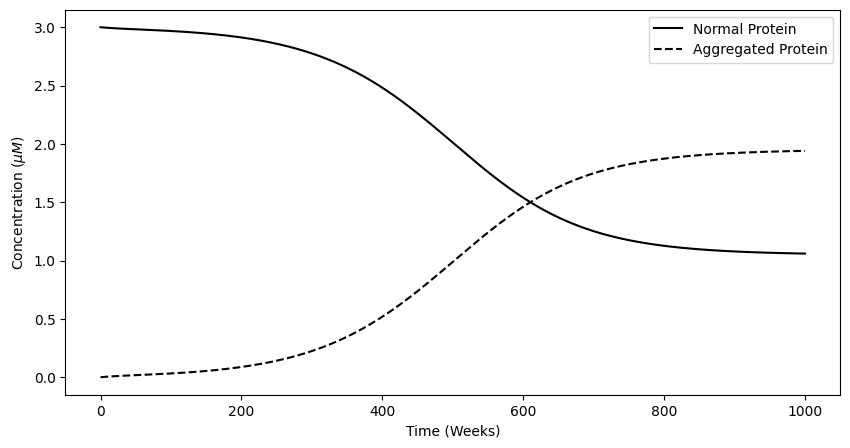

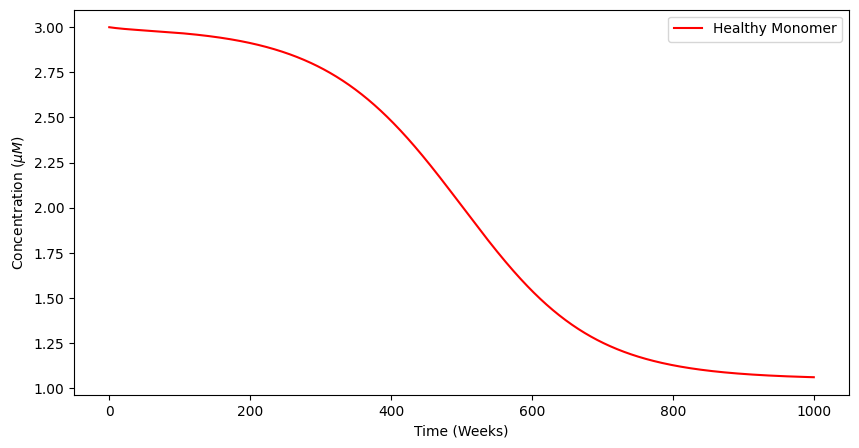

In [11]:
# Define Parameters and Units #

#Healthy Protein Synthesis Rate
alpha = 0.02999684 ;   #\mu M (week)^(-1)

#Protein Degradation Rate
mu = 0.00999548 ;  #(week)^(-1)

#Aggregate Conversion Rate
beta = 0.09999838 ;   #(\mu M)^(-1)(week)^(-1)

#Aggregate Fragmentation Rate
gamma = 0.00099958; #(week)^(-1)

#Minimum Nucleus Size
n0 = 5;     #Number of monomer

#R0 of the system
R0 =  2*alpha*beta*gamma/(mu*(mu + gamma*(n0 - 1))*(mu + gamma*n0))
print('The R0 is equal to', R0)
 

# Initial Conditions #

# Initial Concentration of aggregated prion protein
Z0 = 0.001; #\mu M

# Initial Concentration of # of aggregates
Y0 = 0.001; #\mu M

#Initial Concentration of healthy monomer
X0 = alpha/mu - Z0; #\mu M

#Maximum Time Range
tF = 1000; #Weeks

# A grid of time points (in days)
t = np.linspace(0, tF, tF)

# The Nucleated Polymerization Model
# Input S = (X,Y,Z)
def deriv(S, t, alpha,beta,gamma,mu,n0):
    X, Y, Z = S                        
    dXdt = alpha + gamma*n0*(n0-1)*Y - 2*beta*X*Y - mu*X
    dYdt = gamma*Z -(2*n0-1)*gamma*Y              - mu*Y 
    dZdt = 2*beta*X*Y - gamma*n0*(n0-1)*Y         - mu*Z
    return dXdt, dYdt, dZdt

# Initial conditions vector
S0 = X0, Y0, Z0

# Solve the Differential Equation
ret = odeint(deriv, S0, t, args=(alpha,beta,gamma,mu,n0))
X,Y,Z = ret.T

#Plot the Healthy and Aggregated Protein Concentrations
figure = plt.figure(figsize=(10,5))
X_line, = plt.plot(t,X, label='Normal Protein',color='k')
Z_line, = plt.plot(t,Z, label='Aggregated Protein',color='k',linestyle='dashed')
plt.legend(handles=[X_line, Z_line])
plt.xlabel('Time (Weeks)')
plt.ylabel('Concentration $(\mu M)$')
plt.show()

#Plot the Number of Aggregates
figure = plt.figure(figsize=(10,5))
Y_line, = plt.plot(t,X, label='Healthy Monomer',color='r')
plt.legend(handles=[Y_line])
plt.xlabel('Time (Weeks)')
plt.ylabel('Concentration $(\mu M)$')
plt.show()